In [ ]:
# en el siguiente analisis sobre defunciones viales, trabaje con un archivo csv, intentando mostratr la cantidad de defunciones viales por municiopio,la distribuion de accidentes por clase de victima,una distribucion de las edades de las victimas,

In [6]:
import pandas as pd

# Ruta al archivo CSV
file_path = 'defunciones-incidentes-viales-2017.csv'

# Leer el archivo CSV con punto y coma como delimitador
df = pd.read_csv(file_path, delimiter=';')

# Mostrar las primeras filas del DataFrame
df.head()


,fuente_datos,numero_victima,municipio_id,municipio_nombre,fecha_hecho,hora_hecho,momento_hecho,edad,sexo,clase_victima,vehiculo_victima,tipo_via,tipo_incidente,clima
0,Egresos hospitalarios,2-2017-1293,NaN,NaN,14/12/2016,Sin especificar,Sin especificar,75,Masculino,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar
1,Ministerio de Seguridad,1-2017-1,60412.0,José C. Paz,01/01/2017,7:10:00,Diurno,21,Masculino,Conductor,Vehículo,Ruta provincial,Colisión vehículo/Vehículo,Bueno
2,Ministerio de Seguridad,1-2017-1039,60412.0,José C. Paz,01/01/2017,6:05:00,Nocturno,22,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Sin especificar
3,Ministerio de Seguridad,1-2017-2,60412.0,José C. Paz,01/01/2017,7:10:00,Diurno,42,Masculino,Conductor,Vehículo,Ruta provincial,Colisión vehículo/Vehículo,Bueno
4,Ministerio de Seguridad,1-2017-592,60098.0,Berisso,01/01/2017,1:40:00,Nocturno,18,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Bueno


In [9]:
# Eliminar duplicados
df = df.drop_duplicates()

# Manejar valores faltantes (por ejemplo, rellenar o eliminar)
df = df.dropna()  # Eliminar filas con valores faltantes

# O reemplazar valores faltantes con un valor específico
# df = df.fillna(0)

# Convertir columnas a tipos de datos apropiados (si es necesario)



In [12]:
# Convertir la columna a tipo de datos de fecha
df['fecha'] = pd.to_datetime(df['fecha_hecho'], format='%d/%m/%Y')

(df.head())


,fuente_datos,numero_victima,municipio_id,municipio_nombre,fecha_hecho,hora_hecho,momento_hecho,edad,sexo,clase_victima,vehiculo_victima,tipo_via,tipo_incidente,clima,fecha
1,Ministerio de Seguridad,1-2017-1,60412.0,José C. Paz,01/01/2017,7:10:00,Diurno,21,Masculino,Conductor,Vehículo,Ruta provincial,Colisión vehículo/Vehículo,Bueno,2017-01-01
2,Ministerio de Seguridad,1-2017-1039,60412.0,José C. Paz,01/01/2017,6:05:00,Nocturno,22,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Sin especificar,2017-01-01
3,Ministerio de Seguridad,1-2017-2,60412.0,José C. Paz,01/01/2017,7:10:00,Diurno,42,Masculino,Conductor,Vehículo,Ruta provincial,Colisión vehículo/Vehículo,Bueno,2017-01-01
4,Ministerio de Seguridad,1-2017-592,60098.0,Berisso,01/01/2017,1:40:00,Nocturno,18,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Bueno,2017-01-01
5,Ministerio de Seguridad,1-2017-696,60056.0,Bahía Blanca,01/01/2017,8:00:00,Diurno,19,Masculino,Conductor,Motocicleta,Calle,Colisión vehículo/Vehículo,Sin especificar,2017-01-01


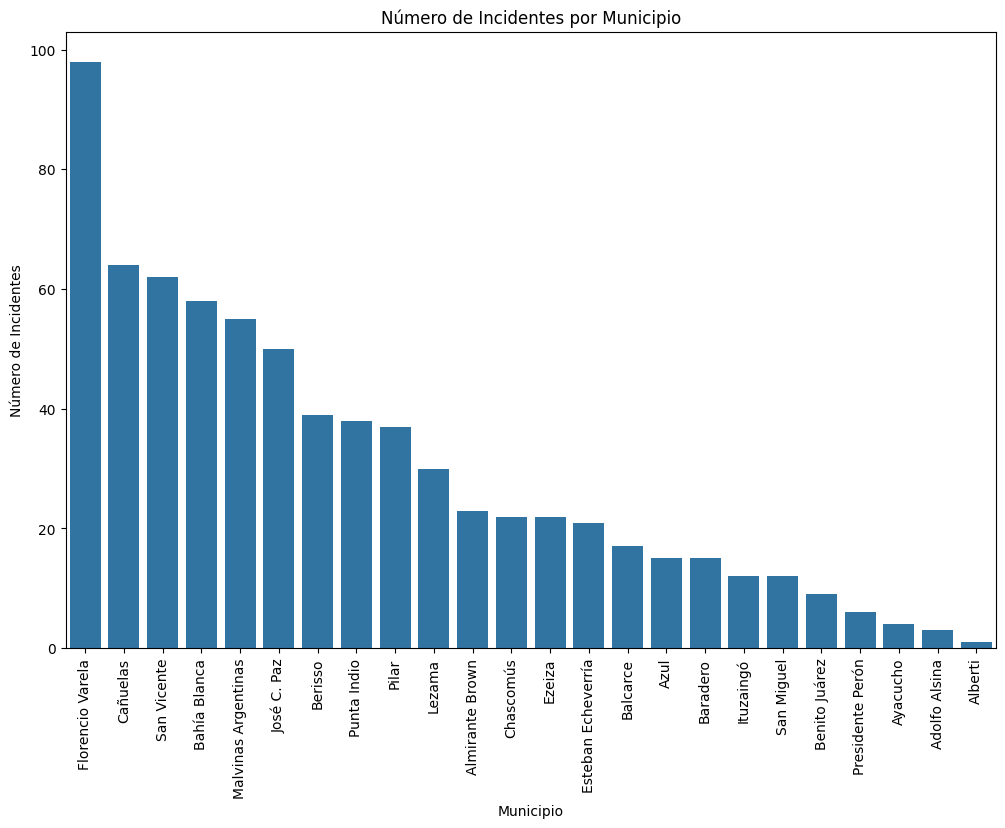

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de incidentes por municipio
incidentes_por_municipio = df['municipio_nombre'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=incidentes_por_municipio.index, y=incidentes_por_municipio.values)
plt.title('Número de Incidentes por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=90)
plt.show()


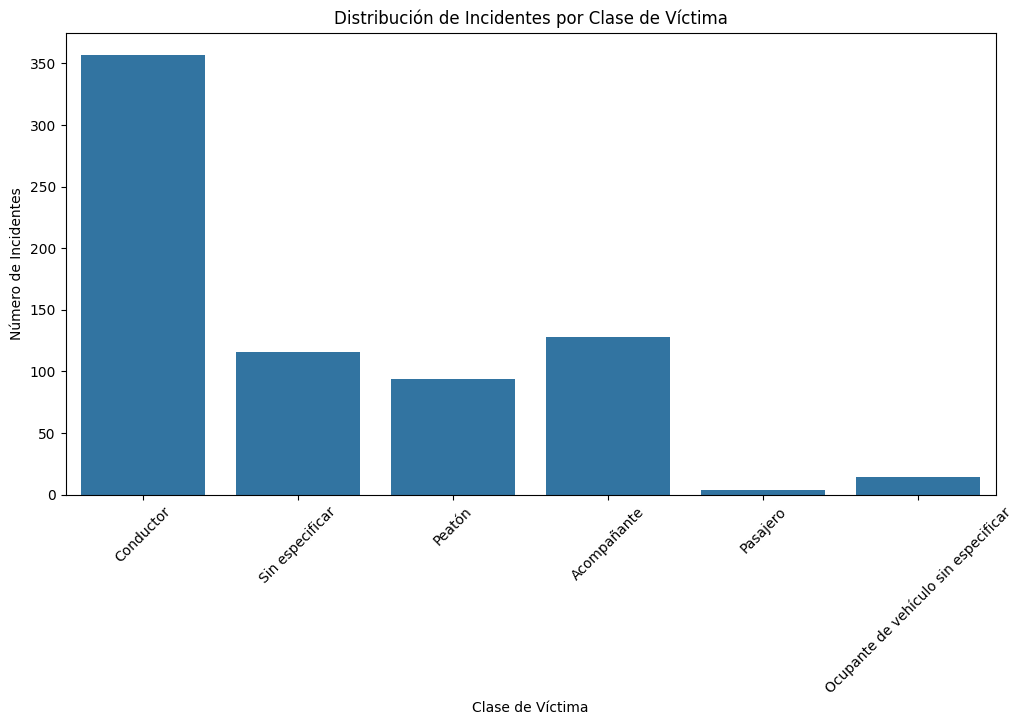

In [14]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='clase_victima')
plt.title('Distribución de Incidentes por Clase de Víctima')
plt.xlabel('Clase de Víctima')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.show()


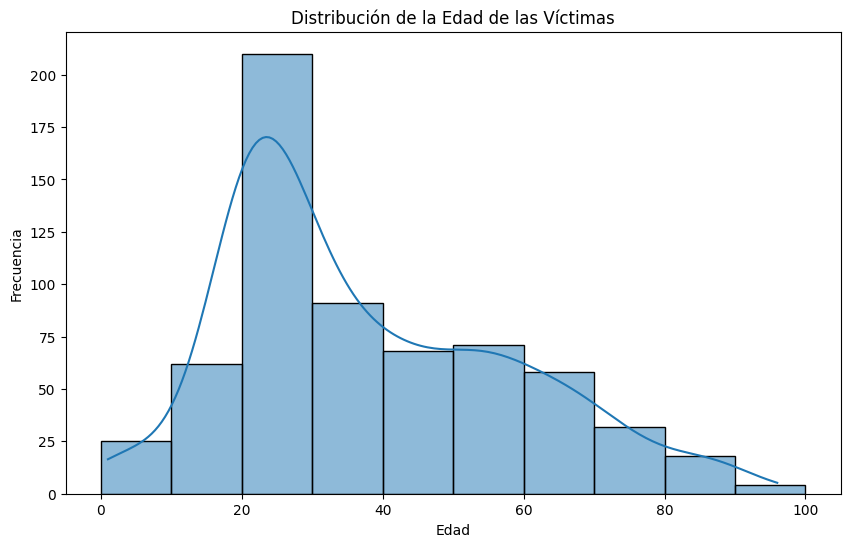

In [21]:
import numpy as np

# Definir bordes de bins manualmente
edges = np.arange(0, df['edad'].max() + 10, 10)  # Ajusta el tamaño del bin (por ejemplo, intervalos de 10 años)

plt.figure(figsize=(10, 6))
sns.histplot(df['edad'].dropna(), bins=edges, kde=True)
plt.title('Distribución de la Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



In [20]:
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

# Verificar si hay valores NaN después de la conversión
print(df['edad'].isna().sum(), "valores NaN en la columna 'edad' después de la conversión")

74 valores NaN en la columna 'edad' después de la conversión


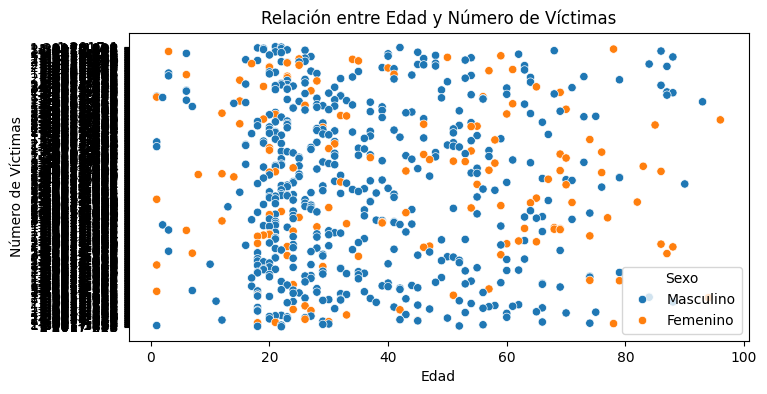

In [23]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='edad', y='numero_victima', hue='sexo')  # Ajusta las variables según tu DataFrame
plt.title('Relación entre Edad y Número de Víctimas')
plt.xlabel('Edad')
plt.ylabel('Número de Víctimas')
plt.legend(title='Sexo')
plt.show()

In [2]:
df['hora_hecho'] = pd.to_datetime(df['hora_hecho'], format='%H:%M:%S').dt.hour

# Contar el número de incidentes por cada hora
incidentes_por_hora = df.groupby('hora_hecho').size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_hora.index, incidentes_por_hora.values, marker='o')
plt.title('Evolución de los incidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de incidentes')
plt.grid(True)
plt.xticks(range(0, 24))  # Asegura que todas las horas se muestren en el eje x
plt.show()

NameError: name 'pd' is not defined

In [4]:
import pandas as pd

# file_path = 'defunciones-incidentes-viales-2017.csv'
ruta al archivo CSV

# Leer el archivo CSV con punto y coma como delimitador
df = pd.read_csv(file_path, delimiter=';')

df['hora_hecho'] = pd.to_datetime(df['hora_hecho'], format='%H:%M:%S').dt.hour

# Contar el número de incidentes por cada hora
incidentes_por_hora = df.groupby('hora_hecho').size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_hora.index, incidentes_por_hora.values, marker='o')
plt.title('Evolución de los incidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de incidentes')
plt.grid(True)
plt.xticks(range(0, 24))  # Asegura que todas las horas se muestren en el eje x
plt.show()

ValueError: time data 'Sin especificar' does not match format '%H:%M:%S' (match)

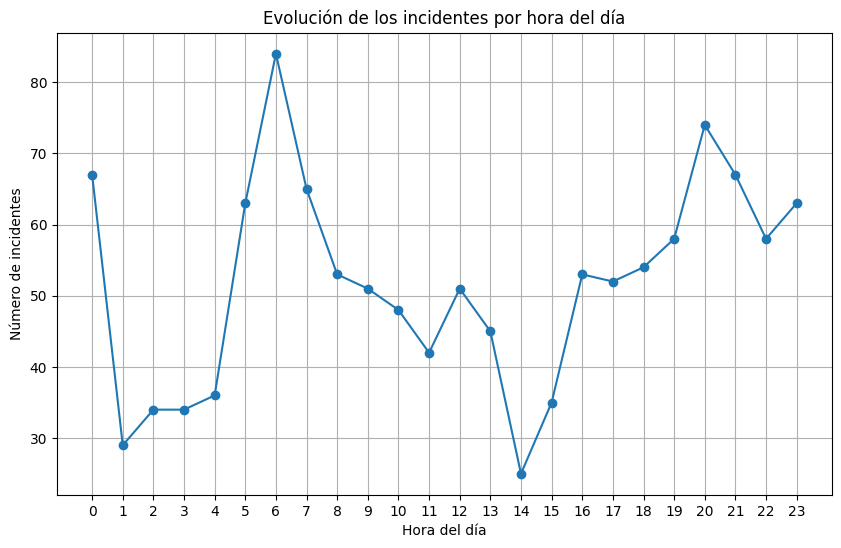

In [5]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde tu repositorio de GitHub
# Ruta al archivo CSV
file_path = 'defunciones-incidentes-viales-2017.csv'

# Leer el archivo CSV con punto y coma como delimitador
df = pd.read_csv(file_path, delimiter=';')

# Intentar convertir la columna 'hora_hecho' a un formato datetime, ignorando errores
df['hora_hecho'] = pd.to_datetime(df['hora_hecho'], format='%H:%M:%S', errors='coerce').dt.hour

# Filtrar las filas que no pudieron ser convertidas (valores NaT)
df = df.dropna(subset=['hora_hecho'])

# Contar el número de incidentes por cada hora
incidentes_por_hora = df.groupby('hora_hecho').size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_hora.index, incidentes_por_hora.values, marker='o')
plt.title('Evolución de los incidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de incidentes')
plt.grid(True)
plt.xticks(range(0, 24))  # Asegura que todas las horas se muestren en el eje x
plt.show()
